# Pattern Mining - Association Rule Mining

A *frequent pattern* is a substructure that appears frequently in a dataset. Finding the frequent patterns of a dataset is a essential step in data mining tasks such as *feature extraction* and a necessary ingredient of *association rule learning*. This kind of algorithms are extremely useful in the field of *Market Basket Analysis*, which in turn provide retailers with invaluable information about their customer shopping habbits and needs. 

Here, I will shortly describe the **GraphLab Create frequent pattern mining toolkit**, the tools it provides and its functionality. Major advantage of this high-level ML toolkit is the ease it provides to train an association rule mining algorithm, as well as the high interpretability of the returned results. Under the hood the GLG frequent pattern mining toolkit runs a [TFP-Growth algorithm](https://www.computer.org/csdl/trans/tk/2005/05/k0652-abs.html), introduced by Wang, Jianyong, et al. in 2005. For a recent review of the various directions in the field consult [Han, Jiawei, et al. "Frequent pattern mining: current status and future directions.", Data Mining and Knowledge Discovery 15.1 (2007): 55-86](http://link.springer.com/article/10.1007%2Fs10618-006-0059-1).

## Load GraphLab Create and Necessary Helper Functions

In [1]:
import graphlab as gl
from graphlab import aggregate as agg
from visualization_helper_functions import *

[INFO] graphlab.cython.cy_server: GraphLab Create v1.10.1 started. Logging: /tmp/graphlab_server_1467121295.log
INFO:graphlab.cython.cy_server:GraphLab Create v1.10.1 started. Logging: /tmp/graphlab_server_1467121295.log


This non-commercial license of GraphLab Create is assigned to tgrammat@gmail.com and will expire on September 21, 2016. For commercial licensing options, visit https://dato.com/buy/.


## A simple retailer example: Loading Data, Exploratory Data Analysis

Here we discuss a simple example of receipt data from a bakery. The dataset consists of items like `'ApplePie'` and `'GanacheCookie'`. The task is to identify sets of items that are frequently bought together. The dataset consists of *266209 rows* and *6 columns* which look like the following. The dataset was constructed by modifying the [Extended BAKERY dataset](https://wiki.csc.calpoly.edu/datasets/wiki/ExtendedBakery).

In [2]:
bakery_sf = gl.SFrame('./bakery_sf')
bakery_sf

Receipt,SaleDate,EmpId,StoreNum,Quantity,Item
1,12-JAN-2000,20,20,1,GanacheCookie
1,12-JAN-2000,20,20,5,ApplePie
2,15-JAN-2000,35,10,1,CoffeeEclair
2,15-JAN-2000,35,10,3,ApplePie
2,15-JAN-2000,35,10,4,AlmondTwist
2,15-JAN-2000,35,10,3,HotCoffee
3,8-JAN-2000,13,13,5,OperaCake
3,8-JAN-2000,13,13,3,OrangeJuice
3,8-JAN-2000,13,13,3,CheeseCroissant
4,24-JAN-2000,16,16,1,TruffleCake


As we can see below, all the coffee products have similar sale frequencies and there is no some particular subset of products that is more preferred than the remaining ones.

Number of Unique Items: 50
Number of Most Frequent Items, Visualized: 30


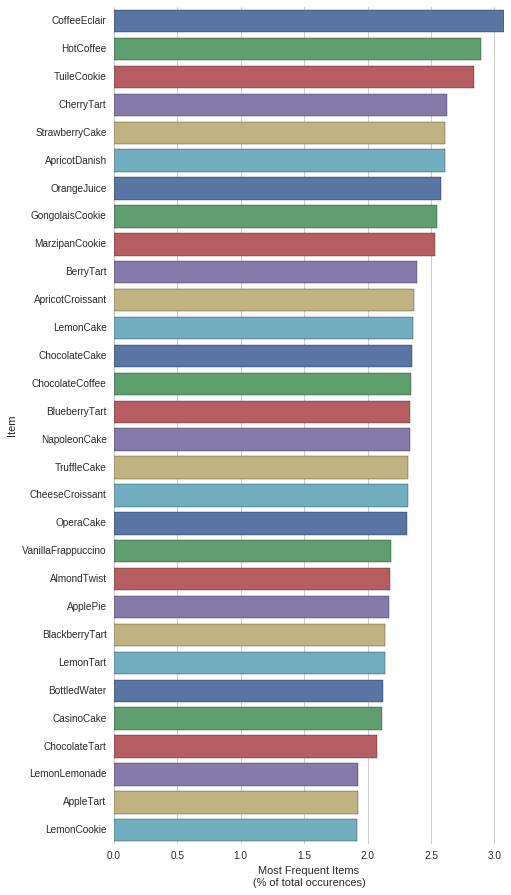

In [3]:
%matplotlib inline
item_freq_plot(bakery_sf, 'Item', ndigits=3, topk=30, 
               seaborn_style='whitegrid', seaborn_palette='deep', color='b')

Next, we split the **`bakery_sf`** data set in a **training** and a **test part**.

In [4]:
(train, test) = bakery_sf.random_split(0.8, seed=1)

In [5]:
print 'Number of Rows in training set [80pct of Known Examples]: %d'   % train.num_rows()
print 'Number of Rows in test set [20pct of Known Examples]: %d'   % test.num_rows()

Number of Rows in training set [80pct of Known Examples]: 212930
Number of Rows in test set [20pct of Known Examples]: 53279


In order to run a frequent pattern mining algorithm, we require an **item column**, (the column **`'Item'`** in this example), and a set of **feature columns** that *uniquely identify* a transaction (the columns **`['Receipt', 'StoreNum']`** in this example, since we need to take in account the geophraphical location of each store and the accompanied social-economic criteria that may exist).

In addition we need to specify the 3 basic parameters of the **FP-Growth algorithm** which is called by the high-level GraphLab Create (GLC) function. These are:

* **`min_support`:** The minimum number of times that a pattern must occur in order to be considered a *frequent* one. Here, we choose a threshold of 1&permil; of total transactions in record to be the `min_support`.
* **`max_patterns`:** The maximum number of frequent patterns to be mined.
* **`min_length`:** The minimum size (number of elements in the set) of each pattern being mined.

In [6]:
min_support = int(train.num_rows()*0.001)

model = gl.frequent_pattern_mining.create(train, 'Item', 
                                          features=['Receipt', 'StoreNum'], 
                                          min_support=min_support,
                                          max_patterns=500, 
                                          min_length=4)

Indexing complete. Found 50 unique items.

Preprocessing complete. Found 73566 unique transactions.

Building frequent pattern tree.

+-----------+----------------+------------+----------------------+------------------+

| Iteration | Num. Patterns  | Support    | Current Min Support  | Elapsed Time     |

+-----------+----------------+------------+----------------------+------------------+

| 0         | 0              | 6550       | 212                  | 323us            |

| 1         | 0              | 6167       | 212                  | 506us            |

| 2         | 0              | 6050       | 212                  | 667us            |

| 3         | 0              | 5587       | 212                  | 900us            |

| 4         | 0              | 5563       | 212                  | 1.027ms          |

| 5         | 0              | 5548       | 212                  | 1.223ms          |

| 6         | 0              | 5495       | 212                  | 1.43ms           |

| 7         | 0              | 5438       | 212                  | 1.721ms          |

| 8         | 0              | 5376       | 212                  | 2.114ms          |

| 9         | 0              | 5088       | 212                  | 6.003ms          |

| 10        | 0              | 5071       | 212                  | 6.46ms           |

| 11        | 0              | 5040       | 212                  | 7.079ms          |

| 12        | 0              | 4994       | 212                  | 8.143ms          |

| 13        | 0              | 4981       | 212                  | 8.866ms          |

| 14        | 0              | 4949       | 212                  | 9.647ms          |

| 15        | 0              | 4948       | 212                  | 10.626ms         |

| 16        | 0              | 4932       | 212                  | 14.178ms         |

| 17        | 0              | 4914       | 212                  | 15.751ms         |

| 18        | 0              | 4913       | 212                  | 16.448ms         |

| 19        | 0              | 4690       | 212                  | 17.215ms         |

| 20        | 0              | 4681       | 212                  | 17.919ms         |

| 21        | 0              | 4613       | 212                  | 18.667ms         |

| 22        | 0              | 4592       | 212                  | 19.765ms         |

| 23        | 1              | 4568       | 212                  | 20.513ms         |

| 24        | 1              | 4506       | 212                  | 21.43ms          |

| 25        | 1              | 4496       | 212                  | 26.342ms         |

| 26        | 1              | 4398       | 212                  | 27.556ms         |

| 27        | 1              | 4122       | 212                  | 28.757ms         |

| 28        | 1              | 4101       | 212                  | 29.566ms         |

| 29        | 1              | 4074       | 212                  | 30.541ms         |

| 30        | 1              | 4071       | 212                  | 31.547ms         |

| 31        | 1              | 4057       | 212                  | 35.024ms         |

| 32        | 1              | 4056       | 212                  | 37.9ms           |

| 33        | 1              | 4055       | 212                  | 39.225ms         |

| 34        | 1              | 4042       | 212                  | 40.44ms          |

| 35        | 2              | 4014       | 212                  | 41.841ms         |

| 36        | 2              | 3711       | 212                  | 47.035ms         |

| 37        | 3              | 3707       | 212                  | 48.709ms         |

| 38        | 8              | 2661       | 212                  | 50.497ms         |

| 39        | 8              | 2619       | 212                  | 54.198ms         |

| 40        | 8              | 2595       | 212                  | 58.03ms          |

| 41        | 8              | 2593       | 212                  | 59.483ms         |

| 42        | 8              | 2576       | 212                  | 60.878ms         |

| 43        | 8              | 2551       | 212                  | 63.732ms         |

| 44        | 8              | 2544       | 212                  | 67.785ms         |

| 45        | 8              | 2538       | 212                  | 74.226ms         |

| 46        | 8              | 2533       | 212                  | 79.034ms         |

| 47        | 8              | 2530       | 212                  | 87.432ms         |

| 48        | 8              | 2521       | 212                  | 90.564ms         |

| 49        | 8              | 2511       | 212                  | 94.818ms         |

| Final     | 8              | -          | 212                  | 97.766ms         |

+-----------+----------------+------------+----------------------+------------------+

Pattern mining complete. Found 8 unique closed patterns.

Here, we obtain the most frequent feature patterns.

In [7]:
print 'The most frequent feature patters are:'
print '-----------------------------------------'
model.frequent_patterns.print_rows(max_column_width=80, max_row_width=90)

The most frequent feature patters are:
-----------------------------------------
+----------------------------------------------------------------------------+---------+
|                                  pattern                                   | support |
+----------------------------------------------------------------------------+---------+
|              [CoffeeEclair, HotCoffee, ApplePie, AlmondTwist]              |   877   |
|      [LemonLemonade, RaspberryCookie, LemonCookie, RaspberryLemonade]      |   813   |
|          [LemonLemonade, RaspberryCookie, LemonCookie, GreenTea]           |   649   |
|        [RaspberryCookie, LemonCookie, RaspberryLemonade, GreenTea]         |   645   |
|            [AppleTart, AppleDanish, AppleCroissant, CherrySoda]            |   640   |
|         [LemonLemonade, LemonCookie, RaspberryLemonade, GreenTea]          |   630   |
|       [LemonLemonade, RaspberryCookie, RaspberryLemonade, GreenTea]        |   620   |
| [LemonLemonade, RaspberryCo

Note that the **`'pattern'`** column contains the patterns that occur frequently together, whereas the **`'support'`** column contains the number of times these patterns occur together in the entire dataset. 

In this example, the pattern:
```
[CoffeeEclair, HotCoffee, ApplePie, AlmondTwist]
```
occurred 877 times in the training data.


**Definition**

> A **frequent pattern** is a *set of items* with a *support greater than* user-specified **minimum support threshold**.

However, there is significant redundancy in mining frequent patterns; every subset of a frequent pattern is also frequent (e.g. `'CoffeeEclair'` must be frequent if `['CoffeeEclair'`, `'HotCoffee']` is frequent). The frequent pattern mining toolkit avoids this redundancy by mining the closed frequent patterns, i.e. *frequent patterns with no superset of the same support*. This is achieved by the very design of the [TFP-Growth Algorithm](https://www.computer.org/csdl/trans/tk/2005/05/k0652-abs.html).

Note, that by relaxing the **`min_length`** requirement, one can obtain more frequent patterns of sold coffe products.

In [8]:
min_support = int(train.num_rows()*0.001)

model = gl.frequent_pattern_mining.create(train, 'Item', 
                                          features=['Receipt', 'StoreNum'], 
                                          min_support=min_support, 
                                          max_patterns=500, 
                                          min_length=3)

Indexing complete. Found 50 unique items.

Preprocessing complete. Found 73566 unique transactions.

Building frequent pattern tree.

+-----------+----------------+------------+----------------------+------------------+

| Iteration | Num. Patterns  | Support    | Current Min Support  | Elapsed Time     |

+-----------+----------------+------------+----------------------+------------------+

| 0         | 0              | 6550       | 212                  | 136us            |

| 1         | 0              | 6167       | 212                  | 197us            |

| 2         | 0              | 6050       | 212                  | 236us            |

| 3         | 0              | 5587       | 212                  | 281us            |

| 4         | 0              | 5563       | 212                  | 327us            |

| 5         | 0              | 5548       | 212                  | 426us            |

| 6         | 0              | 5495       | 212                  | 505us            |

| 7         | 0              | 5438       | 212                  | 608us            |

| 8         | 0              | 5376       | 212                  | 756us            |

| 9         | 0              | 5088       | 212                  | 980us            |

| 10        | 0              | 5071       | 212                  | 1.127ms          |

| 11        | 0              | 5040       | 212                  | 1.349ms          |

| 12        | 0              | 4994       | 212                  | 1.738ms          |

| 13        | 0              | 4981       | 212                  | 2.006ms          |

| 14        | 0              | 4949       | 212                  | 2.301ms          |

| 15        | 1              | 4948       | 212                  | 2.666ms          |

| 16        | 2              | 4932       | 212                  | 3.176ms          |

| 17        | 2              | 4914       | 212                  | 8.244ms          |

| 18        | 2              | 4913       | 212                  | 9.03ms           |

| 19        | 2              | 4690       | 212                  | 10.509ms         |

| 20        | 3              | 4681       | 212                  | 11.23ms          |

| 21        | 3              | 4613       | 212                  | 12ms             |

| 22        | 3              | 4592       | 212                  | 13.167ms         |

| 23        | 7              | 4568       | 212                  | 17.006ms         |

| 24        | 7              | 4506       | 212                  | 17.991ms         |

| 25        | 7              | 4496       | 212                  | 19.307ms         |

| 26        | 8              | 4398       | 212                  | 22.386ms         |

| 27        | 8              | 4122       | 212                  | 23.603ms         |

| 28        | 8              | 4101       | 212                  | 25.248ms         |

| 29        | 9              | 4074       | 212                  | 27.619ms         |

| 30        | 9              | 4071       | 212                  | 28.657ms         |

| 31        | 9              | 4057       | 212                  | 31.523ms         |

| 32        | 9              | 4056       | 212                  | 32.597ms         |

| 33        | 10             | 4055       | 212                  | 34.037ms         |

| 34        | 11             | 4042       | 212                  | 35.372ms         |

| 35        | 15             | 4014       | 212                  | 39.88ms          |

| 36        | 16             | 3711       | 212                  | 42.295ms         |

| 37        | 20             | 3707       | 212                  | 43.932ms         |

| 38        | 31             | 2661       | 212                  | 45.544ms         |

| 39        | 31             | 2619       | 212                  | 50.274ms         |

| 40        | 31             | 2595       | 212                  | 53.028ms         |

| 41        | 31             | 2593       | 212                  | 54.466ms         |

| 42        | 31             | 2576       | 212                  | 57.166ms         |

| 43        | 31             | 2551       | 212                  | 59.702ms         |

| 44        | 31             | 2544       | 212                  | 61.346ms         |

| 45        | 31             | 2538       | 212                  | 66.165ms         |

| 46        | 31             | 2533       | 212                  | 68.72ms          |

| 47        | 31             | 2530       | 212                  | 70.495ms         |

| 48        | 31             | 2521       | 212                  | 72.128ms         |

| 49        | 31             | 2511       | 212                  | 75.187ms         |

| Final     | 31             | -          | 212                  | 79.399ms         |

+-----------+----------------+------------+----------------------+------------------+

Pattern mining complete. Found 31 unique closed patterns.

In [9]:
print 'The most frequent feature patters are:'
print '-----------------------------------------'
model.frequent_patterns.print_rows(num_rows=35, max_column_width=80, max_row_width=90)

The most frequent feature patters are:
-----------------------------------------
+----------------------------------------------------------------------------+---------+
|                                  pattern                                   | support |
+----------------------------------------------------------------------------+---------+
|                   [CherryTart, ApricotDanish, OperaCake]                   |   1561  |
|                   [CoffeeEclair, ApplePie, AlmondTwist]                    |   1351  |
|                [ChocolateCake, ChocolateCoffee, CasinoCake]                |   1308  |
|                [HotCoffee, ApricotCroissant, BlueberryTart]                |   1220  |
|                    [CoffeeEclair, HotCoffee, ApplePie]                     |   1109  |
|                     [HotCoffee, ApplePie, AlmondTwist]                     |   1100  |
|                   [CoffeeEclair, HotCoffee, AlmondTwist]                   |   1086  |
|               [CoffeeEclair

Alternatively, by decreasing the **`min_support`** one can obtain more patterns of sold coffee products which are again assumed frequent but with respect to this new threshold.

In [10]:
min_support = int(train.num_rows()*(1e-04))

model = gl.frequent_pattern_mining.create(train, 'Item', 
                                          features=['Receipt', 'StoreNum'], 
                                          min_support=min_support, 
                                          max_patterns=500, 
                                          min_length=4)

Indexing complete. Found 50 unique items.

Preprocessing complete. Found 73566 unique transactions.

Building frequent pattern tree.

+-----------+----------------+------------+----------------------+------------------+

| Iteration | Num. Patterns  | Support    | Current Min Support  | Elapsed Time     |

+-----------+----------------+------------+----------------------+------------------+

| 0         | 0              | 6550       | 21                   | 133us            |

| 1         | 0              | 6167       | 21                   | 195us            |

| 2         | 0              | 6050       | 21                   | 236us            |

| 3         | 0              | 5587       | 21                   | 281us            |

| 4         | 0              | 5563       | 21                   | 338us            |

| 5         | 0              | 5548       | 21                   | 408us            |

| 6         | 0              | 5495       | 21                   | 527us            |

| 7         | 0              | 5438       | 21                   | 657us            |

| 8         | 0              | 5376       | 21                   | 815us            |

| 9         | 0              | 5088       | 21                   | 1.091ms          |

| 10        | 0              | 5071       | 21                   | 1.345ms          |

| 11        | 0              | 5040       | 21                   | 1.659ms          |

| 12        | 0              | 4994       | 21                   | 2.092ms          |

| 13        | 0              | 4981       | 21                   | 2.65ms           |

| 14        | 0              | 4949       | 21                   | 3.267ms          |

| 15        | 7              | 4948       | 21                   | 4.675ms          |

| 16        | 10             | 4932       | 21                   | 5.868ms          |

| 17        | 11             | 4914       | 21                   | 7.117ms          |

| 18        | 12             | 4913       | 21                   | 8.5ms            |

| 19        | 13             | 4690       | 21                   | 10.128ms         |

| 20        | 14             | 4681       | 21                   | 13.328ms         |

| 21        | 15             | 4613       | 21                   | 15.204ms         |

| 22        | 15             | 4592       | 21                   | 17.977ms         |

| 23        | 16             | 4568       | 21                   | 20.65ms          |

| 24        | 17             | 4506       | 21                   | 23.564ms         |

| 25        | 18             | 4496       | 21                   | 29.893ms         |

| 26        | 25             | 4398       | 21                   | 35.87ms          |

| 27        | 26             | 4122       | 21                   | 42.676ms         |

| 28        | 28             | 4101       | 21                   | 45.593ms         |

| 29        | 28             | 4074       | 21                   | 54.203ms         |

| 30        | 28             | 4071       | 21                   | 57.821ms         |

| 31        | 29             | 4057       | 21                   | 63.617ms         |

| 32        | 31             | 4056       | 21                   | 68.993ms         |

| 33        | 33             | 4055       | 21                   | 74.018ms         |

| 34        | 35             | 4042       | 21                   | 80.425ms         |

| 35        | 37             | 4014       | 21                   | 88.261ms         |

| 36        | 40             | 3711       | 21                   | 97.456ms         |

| 37        | 42             | 3707       | 21                   | 105.653ms        |

| 38        | 47             | 2661       | 21                   | 113.801ms        |

| 39        | 49             | 2619       | 21                   | 122.732ms        |

| 40        | 51             | 2595       | 21                   | 130.796ms        |

| 41        | 51             | 2593       | 21                   | 138.608ms        |

| 42        | 51             | 2576       | 21                   | 146.674ms        |

| 43        | 52             | 2551       | 21                   | 154.631ms        |

| 44        | 53             | 2544       | 21                   | 163.21ms         |

| 45        | 55             | 2538       | 21                   | 171.723ms        |

| 46        | 56             | 2533       | 21                   | 180.705ms        |

| 47        | 56             | 2530       | 21                   | 190.218ms        |

| 48        | 57             | 2521       | 21                   | 201.882ms        |

| 49        | 58             | 2511       | 21                   | 213.301ms        |

| Final     | 59             | -          | 21                   | 225.476ms        |

+-----------+----------------+------------+----------------------+------------------+

Pattern mining complete. Found 59 unique closed patterns.

In [11]:
print 'The most frequent feature patters are:'
print '-----------------------------------------'
model.frequent_patterns.print_rows(num_rows=60, max_row_width=90, max_column_width=80)

The most frequent feature patters are:
-----------------------------------------
+----------------------------------------------------------------------------+---------+
|                                  pattern                                   | support |
+----------------------------------------------------------------------------+---------+
|              [CoffeeEclair, HotCoffee, ApplePie, AlmondTwist]              |   877   |
|      [LemonLemonade, RaspberryCookie, LemonCookie, RaspberryLemonade]      |   813   |
|          [LemonLemonade, RaspberryCookie, LemonCookie, GreenTea]           |   649   |
|        [RaspberryCookie, LemonCookie, RaspberryLemonade, GreenTea]         |   645   |
|            [AppleTart, AppleDanish, AppleCroissant, CherrySoda]            |   640   |
|         [LemonLemonade, LemonCookie, RaspberryLemonade, GreenTea]          |   630   |
|       [LemonLemonade, RaspberryCookie, RaspberryLemonade, GreenTea]        |   620   |
| [LemonLemonade, RaspberryCo

To see some details of the trained model:

In [12]:
print model

Class                         : FrequentPatternMiner

Model fields
------------
Min support                   : 21
Max patterns                  : 500
Min pattern length            : 4

Most frequent patterns
----------------------
['CoffeeEclair', 'HotCoffee', 'ApplePie', 'AlmondTwist']: 877
['LemonLemonade', 'RaspberryCookie', 'LemonCookie', 'RaspberryLemonade']: 813
['LemonLemonade', 'RaspberryCookie', 'LemonCookie', 'GreenTea']: 649
['RaspberryCookie', 'LemonCookie', 'RaspberryLemonade', 'GreenTea']: 645
['AppleTart', 'AppleDanish', 'AppleCroissant', 'CherrySoda']: 640
['LemonLemonade', 'LemonCookie', 'RaspberryLemonade', 'GreenTea']: 630
['LemonLemonade', 'RaspberryCookie', 'RaspberryLemonade', 'GreenTea']: 620
['LemonLemonade', 'RaspberryCookie', 'LemonCookie', 'RaspberryLemonade', 'GreenTea']: 512
['HotCoffee', 'CherryTart', 'ApricotDanish', 'OperaCake']: 29
['CherryTart', 'ApricotDanish', 'OperaCake', 'AlmondBear Claw']: 29



## Top-k frequent patterns

In practice, we rarely know the appropriate **`min_support`** threshold to use. As an alternative to specifying a minimum support, we can specify a **maximum number of patterns** to mine using the **`max_patterns`** parameter. Instead of mining all patterns above a minimum support threshold, we mine the most frequent patterns until the maximum number of closed patterns are found. For large data sets, this mining process can be time-consuming. We recommend specifying a somehow *large initial minimum support* bound to speed up the mining.

In [13]:
min_support = int(train.num_rows()*1e-03)

top5_freq_patterns = gl.frequent_pattern_mining.create(train, 'Item',
                                                       features=['Receipt', 'StoreNum'],
                                                       min_support=min_support,
                                                       max_patterns=5,
                                                       min_length=4)

Indexing complete. Found 50 unique items.

Preprocessing complete. Found 73566 unique transactions.

Building frequent pattern tree.

+-----------+----------------+------------+----------------------+------------------+

| Iteration | Num. Patterns  | Support    | Current Min Support  | Elapsed Time     |

+-----------+----------------+------------+----------------------+------------------+

| 0         | 0              | 6550       | 212                  | 132us            |

| 1         | 0              | 6167       | 212                  | 189us            |

| 2         | 0              | 6050       | 212                  | 229us            |

| 3         | 0              | 5587       | 212                  | 273us            |

| 4         | 0              | 5563       | 212                  | 318us            |

| 5         | 0              | 5548       | 212                  | 388us            |

| 6         | 0              | 5495       | 212                  | 463us            |

| 7         | 0              | 5438       | 212                  | 561us            |

| 8         | 0              | 5376       | 212                  | 703us            |

| 9         | 0              | 5088       | 212                  | 917us            |

| 10        | 0              | 5071       | 212                  | 1.06ms           |

| 11        | 0              | 5040       | 212                  | 1.286ms          |

| 12        | 0              | 4994       | 212                  | 1.664ms          |

| 13        | 0              | 4981       | 212                  | 1.921ms          |

| 14        | 0              | 4949       | 212                  | 2.205ms          |

| 15        | 0              | 4948       | 212                  | 2.551ms          |

| 16        | 0              | 4932       | 212                  | 3.056ms          |

| 17        | 0              | 4914       | 212                  | 3.857ms          |

| 18        | 0              | 4913       | 212                  | 4.494ms          |

| 19        | 0              | 4690       | 212                  | 5.22ms           |

| 20        | 0              | 4681       | 212                  | 5.899ms          |

| 21        | 0              | 4613       | 212                  | 6.618ms          |

| 22        | 0              | 4592       | 212                  | 7.708ms          |

| 23        | 1              | 4568       | 212                  | 8.475ms          |

| 24        | 1              | 4506       | 212                  | 9.324ms          |

| 25        | 1              | 4496       | 212                  | 10.522ms         |

| 26        | 1              | 4398       | 212                  | 11.521ms         |

| 27        | 1              | 4122       | 212                  | 12.693ms         |

| 28        | 1              | 4101       | 212                  | 13.547ms         |

| 29        | 1              | 4074       | 212                  | 14.591ms         |

| 30        | 1              | 4071       | 212                  | 15.567ms         |

| 31        | 1              | 4057       | 212                  | 16.549ms         |

| 32        | 1              | 4056       | 212                  | 17.594ms         |

| 33        | 1              | 4055       | 212                  | 19.075ms         |

| 34        | 1              | 4042       | 212                  | 20.368ms         |

| 35        | 2              | 4014       | 212                  | 21.721ms         |

| 36        | 2              | 3711       | 212                  | 23.369ms         |

| 37        | 3              | 3707       | 212                  | 25.109ms         |

| 38        | 5              | 2661       | 640                  | 26.908ms         |

| 39        | 5              | 2619       | 640                  | 28.217ms         |

| 40        | 5              | 2595       | 640                  | 29.544ms         |

| 41        | 5              | 2593       | 640                  | 30.872ms         |

| 42        | 5              | 2576       | 640                  | 32.285ms         |

| 43        | 5              | 2551       | 640                  | 33.733ms         |

| 44        | 5              | 2544       | 640                  | 35.259ms         |

| 45        | 5              | 2538       | 640                  | 36.945ms         |

| 46        | 5              | 2533       | 640                  | 38.554ms         |

| 47        | 5              | 2530       | 640                  | 40.203ms         |

| 48        | 5              | 2521       | 640                  | 41.847ms         |

| 49        | 5              | 2511       | 640                  | 43.647ms         |

| Final     | 5              | -          | 640                  | 45.439ms         |

+-----------+----------------+------------+----------------------+------------------+

Pattern mining complete. Found 5 unique closed patterns.

The top-5 most frequent patterns are:

In [14]:
print top5_freq_patterns

Class                         : FrequentPatternMiner

Model fields
------------
Min support                   : 212
Max patterns                  : 5
Min pattern length            : 4

Most frequent patterns
----------------------
['CoffeeEclair', 'HotCoffee', 'ApplePie', 'AlmondTwist']: 877
['LemonLemonade', 'RaspberryCookie', 'LemonCookie', 'RaspberryLemonade']: 813
['LemonLemonade', 'RaspberryCookie', 'LemonCookie', 'GreenTea']: 649
['RaspberryCookie', 'LemonCookie', 'RaspberryLemonade', 'GreenTea']: 645
['AppleTart', 'AppleDanish', 'AppleCroissant', 'CherrySoda']: 640



We can always save the trained model by calling:

In [15]:
top5_freq_patterns.save('./top5_freq_patterns_model')

## Business Use Case: Compute Association Rules and Make Predictions

An association rule is an ordered pair of item sets (prefix \\( A \\), prediction \\( B \\)) denoted \\( A\Rightarrow B \\) such that \\( A \\) and \\( B \\)  are disjoint whereas \\( A\cup B \\) is frequent. The most popular criteria for scoring association rules is to measure the **confidence of the rule**: the ratio of the support of \\( A\cup B \\) to the support of \\( A \\).

\\[ \textrm{Confidence}(A\Rightarrow B) = \frac{\textrm{Supp}(A\cup B)}{\textrm{Supp}(A)}. \\]

The confidence of the rule \\( A\Rightarrow B \\) is our empirical estimate of the conditional probability for \\( B \\) given \\( A \\).

One can make predictions using the **`predict()`** or **`predict_topk()`** method for single and multiple predictions respectively. The output of both the methods is an **SFrame** with the following columns:

* **prefix**: The antecedent or left-hand side of an association rule. It must be a frequent pattern and a subset of the associated pattern.
* **prediction**: The consequent or right-hand side of the association rule. It must be disjoint of the prefix.
* **confidence**: The confidence of the association rule as defined above.
* **prefix support**: The frequency of the prefix pattern in the training data.
* **joint support**: The frequency of the co-occurrence ( prefix + prediction) in the training data

In [16]:
predictions = top5_freq_patterns.predict(test)

Preprocessing complete. Found 39293 unique transactions.

In [17]:
predictions.print_rows(max_row_width=100)

+---------+----------+----------------------------+--------------------+-----------------+----------------+
| Receipt | StoreNum |           prefix           |     prediction     |    confidence   | prefix support |
+---------+----------+----------------------------+--------------------+-----------------+----------------+
|  35020  |    14    |             []             |   [CoffeeEclair]   | 0.0890356958378 |     73566      |
|   6447  |    5     | [BlueberryTart, HotCoffee] | [ApricotCroissant] |  0.728793309438 |      1674      |
|  12900  |    10    |      [BlueberryTart]       | [ApricotCroissant] |  0.412691996766 |      4948      |
|  49658  |    20    |      [BlueberryTart]       | [ApricotCroissant] |  0.412691996766 |      4948      |
|  20227  |    19    |    [RaspberryLemonade]     | [RaspberryCookie]  |  0.334982681841 |      4042      |
|  30891  |    12    |      [BlueberryTart]       | [ApricotCroissant] |  0.412691996766 |      4948      |
|  47850  |    2     |      

## Feature Engineering to help other ML Tasks in Pipeline 

### The `.extract_feature()` method

Using the set of closed patterns, we can convert pattern data to binary features vectors. These feature vectors can be used for other machine learning tasks, such as **clustering** or **classification**. For each input pattern `x`, the `j-th` extracted feature `f_{x}[j]` is a binary indicator of whether the `j-th` closed pattern is contained in `x`.

First, we train the **`top100_freq_patterns`** model as shown below:

In [18]:
top100_freq_patterns = gl.frequent_pattern_mining.\
create(train, 'Item',
       features=['Receipt', 'StoreNum'],
       # occurs at least once in our data record
       min_support=1, 
       # do not search for more than 100 patterns
       max_patterns = 100, 
       # test data have only one coffee product sold per tid .
       # We search for patterns of at least 2 coffee products
       min_length=2)

Indexing complete. Found 50 unique items.

Preprocessing complete. Found 73566 unique transactions.

Building frequent pattern tree.

+-----------+----------------+------------+----------------------+------------------+

| Iteration | Num. Patterns  | Support    | Current Min Support  | Elapsed Time     |

+-----------+----------------+------------+----------------------+------------------+

| 0         | 0              | 6550       | 126                  | 128us            |

| 1         | 0              | 6167       | 126                  | 197us            |

| 2         | 1              | 6050       | 126                  | 239us            |

| 3         | 3              | 5587       | 126                  | 311us            |

| 4         | 6              | 5563       | 126                  | 371us            |

| 5         | 10             | 5548       | 126                  | 449us            |

| 6         | 15             | 5495       | 126                  | 552us            |

| 7         | 21             | 5438       | 126                  | 688us            |

| 8         | 28             | 5376       | 126                  | 854us            |

| 9         | 36             | 5088       | 126                  | 1.097ms          |

| 10        | 45             | 5071       | 126                  | 1.503ms          |

| 11        | 55             | 5040       | 126                  | 1.845ms          |

| 12        | 66             | 4994       | 126                  | 2.66ms           |

| 13        | 78             | 4981       | 126                  | 3.273ms          |

| 14        | 91             | 4949       | 126                  | 3.891ms          |

| 15        | 100            | 4948       | 183                  | 4.709ms          |

| 16        | 100            | 4932       | 199                  | 5.664ms          |

| 17        | 100            | 4914       | 212                  | 6.998ms          |

| 18        | 100            | 4913       | 219                  | 7.81ms           |

| 19        | 100            | 4690       | 221                  | 8.643ms          |

| 20        | 100            | 4681       | 223                  | 9.296ms          |

| 21        | 100            | 4613       | 225                  | 10.092ms         |

| 22        | 100            | 4592       | 227                  | 11.236ms         |

| 23        | 100            | 4568       | 229                  | 12.139ms         |

| 24        | 100            | 4506       | 230                  | 12.977ms         |

| 25        | 100            | 4496       | 233                  | 14.184ms         |

| 26        | 100            | 4398       | 236                  | 15.339ms         |

| 27        | 100            | 4122       | 237                  | 16.361ms         |

| 28        | 100            | 4101       | 237                  | 17.09ms          |

| 29        | 100            | 4074       | 240                  | 18.212ms         |

| 30        | 100            | 4071       | 241                  | 19.21ms          |

| 31        | 100            | 4057       | 241                  | 20.154ms         |

| 32        | 100            | 4056       | 241                  | 21.253ms         |

| 33        | 100            | 4055       | 242                  | 22.558ms         |

| 34        | 100            | 4042       | 243                  | 23.978ms         |

| 35        | 100            | 4014       | 246                  | 25.507ms         |

| 36        | 100            | 3711       | 247                  | 27.112ms         |

| 37        | 100            | 3707       | 250                  | 28.944ms         |

| 38        | 100            | 2661       | 259                  | 30.847ms         |

| 39        | 100            | 2619       | 259                  | 32.212ms         |

| 40        | 100            | 2595       | 259                  | 33.59ms          |

| 41        | 100            | 2593       | 259                  | 35.071ms         |

| 42        | 100            | 2576       | 259                  | 36.617ms         |

| 43        | 100            | 2551       | 259                  | 38.187ms         |

| 44        | 100            | 2544       | 259                  | 39.781ms         |

| 45        | 100            | 2538       | 259                  | 41.431ms         |

| 46        | 100            | 2533       | 259                  | 43.043ms         |

| 47        | 100            | 2530       | 259                  | 49.919ms         |

| 48        | 100            | 2521       | 259                  | 51.721ms         |

| 49        | 100            | 2511       | 259                  | 58.393ms         |

| Final     | 100            | -          | 259                  | 60.306ms         |

+-----------+----------------+------------+----------------------+------------------+

Pattern mining complete. Found 100 unique closed patterns.

Here are the 100 unique closed patterns which are found frequent:

In [19]:
top100_freq_patterns.frequent_patterns.\
print_rows(num_rows=100, max_row_width=90, max_column_width=80)

+----------------------------------------------------------------------------+---------+
|                                  pattern                                   | support |
+----------------------------------------------------------------------------+---------+
|                        [CherryTart, ApricotDanish]                         |   2542  |
|                       [TuileCookie, MarzipanCookie]                        |   2419  |
|                      [ChocolateCake, ChocolateCoffee]                      |   2176  |
|                       [GongolaisCookie, TruffleCake]                       |   2131  |
|                       [OrangeJuice, CheeseCroissant]                       |   2079  |
|                          [CherryTart, OperaCake]                           |   2067  |
|                         [ApricotDanish, OperaCake]                         |   2046  |
|                     [ApricotCroissant, BlueberryTart]                      |   2042  |
|                    

Next, we apply the **`extract_features()`** method of this newly trained **`top100_freq_patterns`** model on the **`test`** data set.

In [20]:
features = top100_freq_patterns.extract_features(train)

Preprocessing complete. Found 73566 unique transactions.

Once the features are extracted, we can use them downstream in other applications such as **clustering**, **classification**, **churn prediction**, **recommender systems** etc.

In [21]:
features.print_rows(num_rows=10, max_row_width=90, max_column_width=100)

+---------+----------+
| Receipt | StoreNum |
+---------+----------+
|   8829  |    7     |
|  35020  |    14    |
|  38810  |    20    |
|   6015  |    7     |
|  68521  |    3     |
|   6447  |    5     |
|  12900  |    10    |
|  49658  |    20    |
|  20227  |    19    |
|  47850  |    2     |
+---------+----------+
+-----------------------------------------------------------------------------------------------------+
|                                          extracted_features                                         |
+-----------------------------------------------------------------------------------------------------+
| [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... |
| [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... |
| [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... |
| [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

### Example: Employee Space Clustering by using occurrences of frequency patterns

First, we provide an aggregated form of our data by selecting one **Selling Employee (`EmpId`)** at random.

In [22]:
emps = train.groupby(['Receipt', 'StoreNum'],
                     {'EmpId': agg.SELECT_ONE('EmpId')})
emps

Receipt,StoreNum,EmpId
8829,7,7
35020,14,14
38810,20,20
6015,7,7
68521,3,3
6447,5,5
12900,10,35
49658,20,20
20227,19,50
47850,2,23


Next, we count the instances that each of the **`top100_freq_patterns`** occurs per **`EmpId`**.

In [23]:
emp_space = emps.join(features).\
groupby('EmpId', {'all_features': agg.SUM('extracted_features')})

emp_space

EmpId,all_features
49,"[41.0, 53.0, 35.0, 42.0,45.0, 30.0, 30.0, 31.0, ..."
13,"[126.0, 130.0, 95.0,77.0, 91.0, 100.0, 10 ..."
14,"[140.0, 113.0, 107.0,101.0, 116.0, 121.0, ..."
48,"[28.0, 34.0, 28.0, 23.0,29.0, 23.0, 19.0, 23.0, ..."
20,"[133.0, 129.0, 123.0,110.0, 109.0, 108.0, ..."
12,"[15.0, 19.0, 16.0, 14.0,16.0, 11.0, 14.0, 13.0, ..."
22,"[52.0, 48.0, 37.0, 45.0,46.0, 41.0, 35.0, 36.0, ..."
36,"[35.0, 35.0, 46.0, 38.0,33.0, 30.0, 22.0, 32.0, ..."
10,"[38.0, 40.0, 35.0, 40.0,38.0, 36.0, 36.0, 29.0, ..."
29,"[17.0, 10.0, 13.0, 19.0,16.0, 13.0, 16.0, 19.0, ..."


Finally, we train a **kmeans** algorithm to produce a **3 centered cluster**.

In [24]:
cl_model = gl.kmeans.create(emp_space, 
                            features = ['all_features'], 
                            num_clusters=3)

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 47        |

| 1             | 25        |

| 2             | 49        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

In [25]:
emp_space['cluster_id'] = cl_model['cluster_id']['cluster_id']
emp_space

EmpId,all_features,cluster_id
49,"[41.0, 53.0, 35.0, 42.0,45.0, 30.0, 30.0, 31.0, ...",0
13,"[126.0, 130.0, 95.0,77.0, 91.0, 100.0, 10 ...",1
14,"[140.0, 113.0, 107.0,101.0, 116.0, 121.0, ...",1
48,"[28.0, 34.0, 28.0, 23.0,29.0, 23.0, 19.0, 23.0, ...",0
20,"[133.0, 129.0, 123.0,110.0, 109.0, 108.0, ...",1
12,"[15.0, 19.0, 16.0, 14.0,16.0, 11.0, 14.0, 13.0, ...",2
22,"[52.0, 48.0, 37.0, 45.0,46.0, 41.0, 35.0, 36.0, ...",0
36,"[35.0, 35.0, 46.0, 38.0,33.0, 30.0, 22.0, 32.0, ...",0
10,"[38.0, 40.0, 35.0, 40.0,38.0, 36.0, 36.0, 29.0, ...",0
29,"[17.0, 10.0, 13.0, 19.0,16.0, 13.0, 16.0, 19.0, ...",2


And we can provide a countplot of the **Number of Stores** per **Cluster Id** as below.

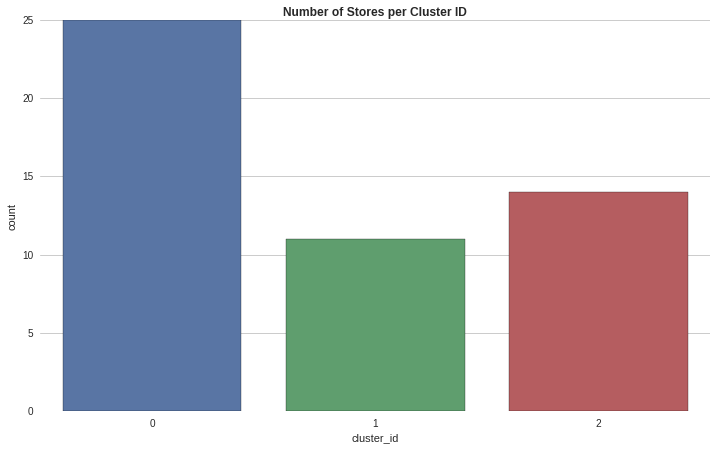

In [26]:
%matplotlib inline
segments_countplot(emp_space, x='cluster_id', 
                   figsize_tuple=(12,7), title='Number of Stores per Cluster ID')